<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/Classification/Decision_tree_ID3_TA_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!gdown 1eTn_pK1awSlmRnpGSSX_WnT5JKcyTPGq
!gdown 1U1KykX3TcLdIFBZScLxIw2w-GVcrFZZ8

Downloading...
From: https://drive.google.com/uc?id=1eTn_pK1awSlmRnpGSSX_WnT5JKcyTPGq
To: /content/GolfTest.csv
100% 132/132 [00:00<00:00, 544kB/s]
Downloading...
From: https://drive.google.com/uc?id=1U1KykX3TcLdIFBZScLxIw2w-GVcrFZZ8
To: /content/Golf.csv
100% 435/435 [00:00<00:00, 1.44MB/s]


# ID3 From scratch

## Data

In [ ]:
data = pd.read_csv('/content/Golf.csv')
data

,Outlook,Temperature,Humidity,Wind,Play Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
data.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


## Model

## Entropy

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [ ]:
labels=data['play']
len(labels),labels.unique(),labels.value_counts ()

(14,
 array(['No', 'Yes'], dtype=object),
 play
 Yes    9
 No     5
 Name: count, dtype: int64)

In [ ]:
p=labels.value_counts ()/len(labels)
p

,count
play,
Yes,0.642857
No,0.357143


In [ ]:
def entropy(labels):
  p=labels.value_counts()/len(labels)
  return -sum(p*np.log2(p))

In [ ]:
entropy(data['play'])

0.9402859586706311

## Information Gain

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [ ]:
target='play'
entropy_parent=entropy(data[target])
entropy_parent

0.9402859586706311

In [ ]:
entropy_child=0
feature='wind'
for value in data[feature].unique():
  subset=data[data[feature]==value]
  display(subset)
  wi=len(subset)/len(data)
  entropy_child += wi*entropy(subset[target])

information_gain=entropy_parent-entropy_child



print(information_gain)

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
12,Overcast,Hot,Normal,Weak,Yes


,outlook,temperature,humidity,wind,play
1,Sunny,Hot,High,Strong,No
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
13,Rain,Hot,High,Strong,No


0.04812703040826949


In [ ]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [ ]:
information_gain(data, 'wind', 'play')

0.04812703040826949

In [ ]:
information_gain(data, 'humidity', 'play')

0.15183550136234159

In [ ]:
data.iloc[:, :-1].columns

Index(['outlook', 'temperature', 'humidity', 'wind'], dtype='object')

In [ ]:
[information_gain(data, feature, 'play') for feature in data.iloc[:,:-1].columns]

[0.24674981977443933,
 0.10389267691729642,
 0.15183550136234159,
 0.04812703040826949]

In [ ]:
np.argmax([information_gain(data, feature, 'play') for feature in data.iloc[:,:-1].columns])

np.int64(0)

## Decision Tree & Node

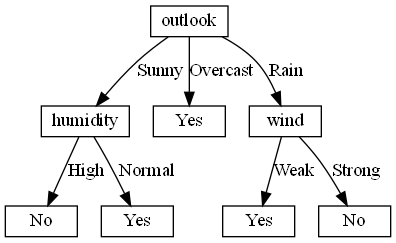


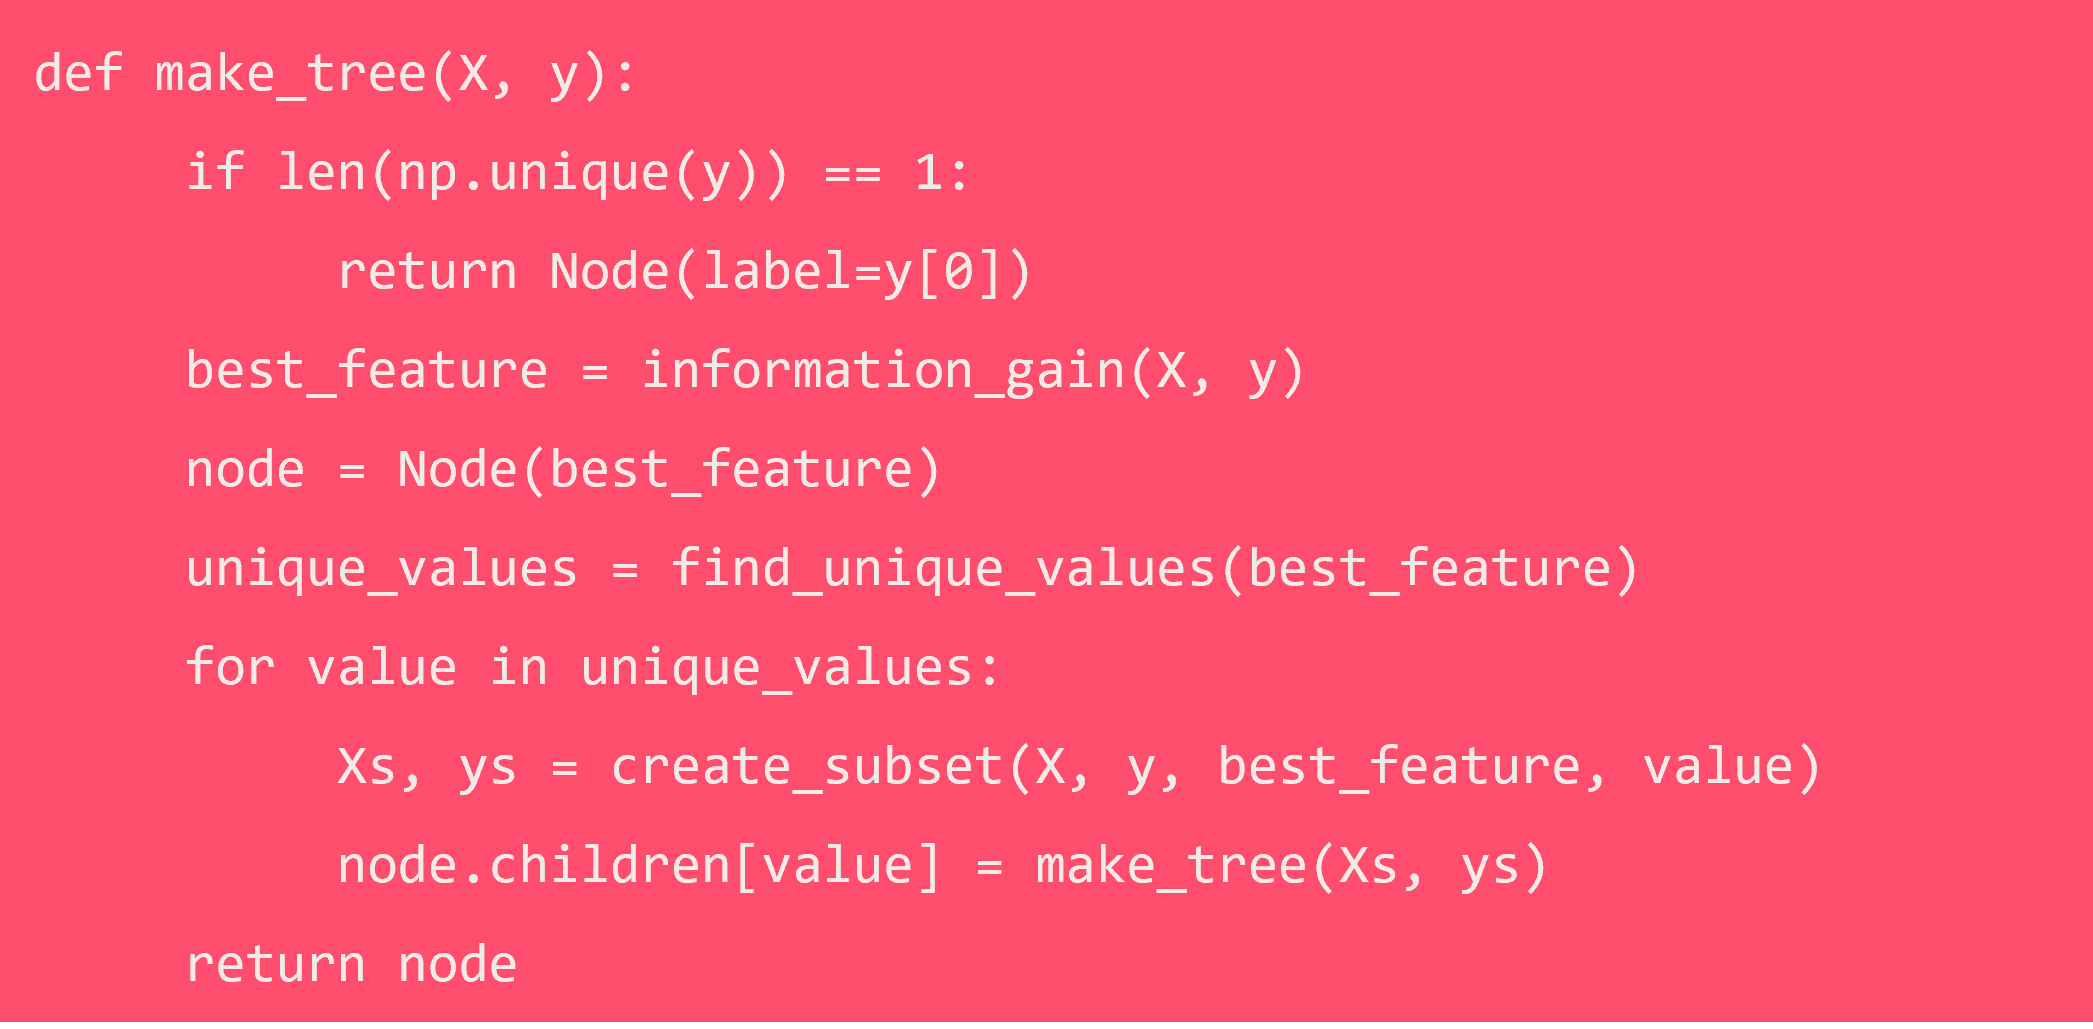


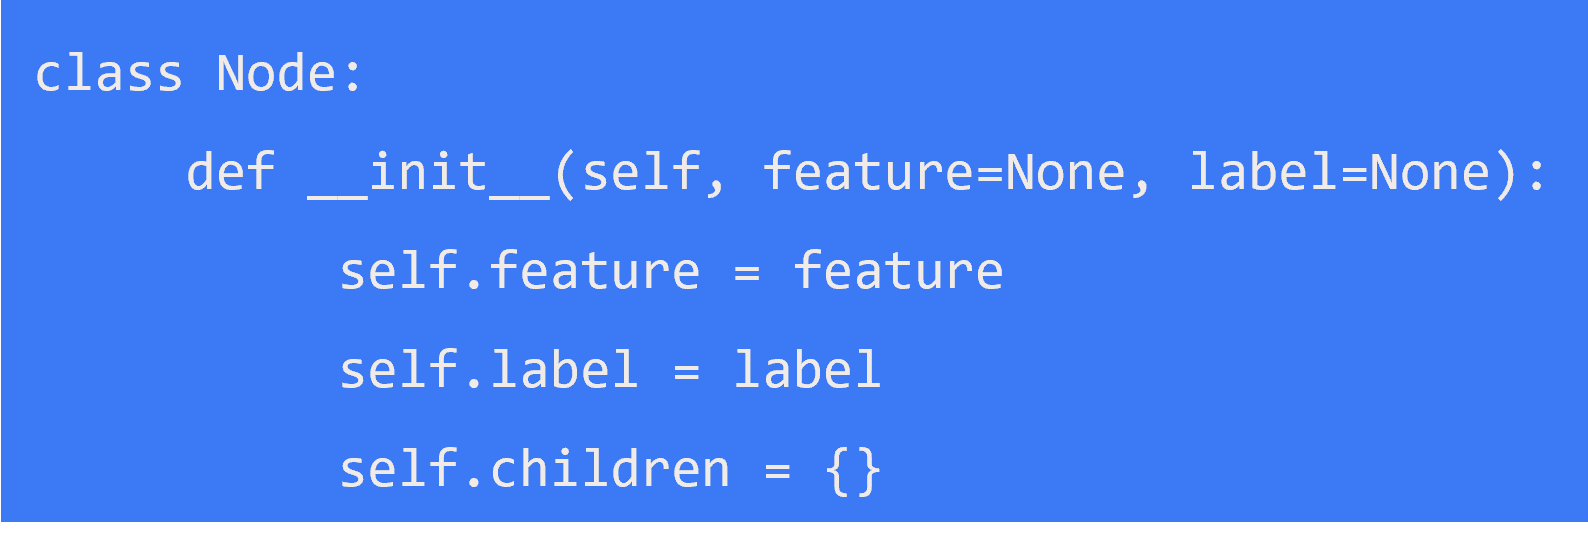
"""

In [ ]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

Node(label='wind')
#Node(label='yes')

LeafNode(label="wind")

In [ ]:
def make_tree(data, target):
  # Leaf Node?
  if len(data[target].unique()) == 1:
    return Node(label = data[target].iloc[0])

  # Calculate IG
  features = data.drop(target, axis=1).columns
  gains = [information_gain(data, feature, target) for feature in features]

  # Greedy Search for findinf Best Feature
  max_gain_idx = np.argmax(gains)
  best_feature = features[max_gain_idx]

  # Make a Node
  node = Node(feature = best_feature)

  # Loop over the Best Feature
  for value in data[best_feature].unique():
    subset = data[data[best_feature] == value].drop(best_feature, axis=1)
    display(subset)

    node.children[value] = make_tree(subset, target)

  return node

In [ ]:
tree=make_tree(data,'play')
tree

,temperature,humidity,wind,play
0,Hot,High,Weak,No
1,Hot,High,Strong,No
7,Mild,High,Weak,No
8,Cool,Normal,Weak,Yes
10,Mild,Normal,Strong,Yes


,temperature,wind,play
0,Hot,Weak,No
1,Hot,Strong,No
7,Mild,Weak,No


,temperature,wind,play
8,Cool,Weak,Yes
10,Mild,Strong,Yes


,temperature,humidity,wind,play
2,Hot,High,Weak,Yes
6,Cool,Normal,Strong,Yes
11,Mild,High,Strong,Yes
12,Hot,Normal,Weak,Yes


,temperature,humidity,wind,play
3,Mild,High,Weak,Yes
4,Cool,Normal,Weak,Yes
5,Cool,Normal,Strong,No
9,Mild,Normal,Weak,Yes
13,Hot,High,Strong,No


,temperature,humidity,play
3,Mild,High,Yes
4,Cool,Normal,Yes
9,Mild,Normal,Yes


,temperature,humidity,play
5,Cool,Normal,No
13,Hot,High,No


DecisionNode(feature="outlook", children={'Sunny': DecisionNode(feature="humidity", children={'High': LeafNode(label="No"), 'Normal': LeafNode(label="Yes")}), 'Overcast': LeafNode(label="Yes"), 'Rain': DecisionNode(feature="wind", children={'Weak': LeafNode(label="Yes"), 'Strong': LeafNode(label="No")})})

In [ ]:
tree.feature

'outlook'

## Evaluation

In [ ]:
data_test=pd.read_csv('GolfTest.csv')
data_test.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data_test

,outlook,temperature,humidity,wind,play
0,Overcast,Mild,High,Weak,Yes
1,Rain,Cool,Normal,Strong,No
2,Sunny,Hot,Normal,Weak,Yes


In [ ]:
def predict(node, sample):
  if node.feature is None:
    return node.label

  feature_value=sample[node.feature]

  if feature_value in node.children:
    return predict(node.children[feature_value], sample)
  else:
    return node.label

#[predict(tree, sample) for _, sample in data_test.iterrows()]

[predict(tree, data_test.iloc[i,:]) for i in range(len(data_test))]

['Yes', 'No', 'Yes']

## Visualization

In [ ]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

# DT With Scikit

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

In [ ]:
iris=load_iris()
X, y=iris.data, iris.target

X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0)
X_train.shape,X_test.shape

((112, 4), (38, 4))

In [ ]:
clf=tree.DecisionTreeClassifier(random_state=42,max_depth=3,ccp_alpha=0.1)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=3, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

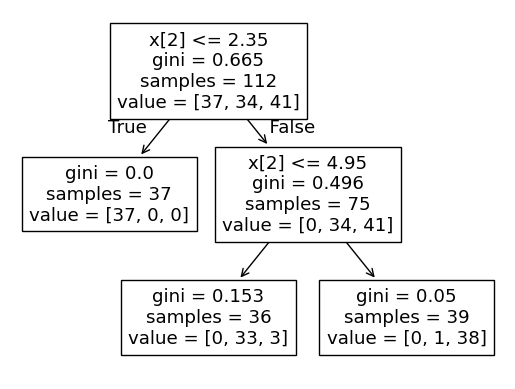

In [ ]:
tree.plot_tree(clf)

#Using ";" makes the texts disappear

In [ ]:
# clf.tree_.
#Using . in the end shows different options for tree instance
#clf.tree_.node_count, clf.tree_.n_leaves
#clf.tree_.node_count
#clf.tree_.n_leaves
#clf.tree_.n_node_samples
#clf.tree_.children_left
#clf.tree_.children_right
#clf.tree_.value
clf.tree_.feature
#clf.tree_.threshold
#clf.tree_.impurity
#clf.tree_.max_depth

array([ 2, -2,  2, -2, -2], dtype=int64)

In [ ]:
r=tree.export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 4.95
|   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- class: 2



In [ ]:
r=tree.export_text(clf)
print(r)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2



## predict

In [ ]:
clf.predict(X_test)
clf.score(X_test,y_test)

0.8947368421052632

In [ ]:
clf.predict_proba(X_test)

array([[0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.

In [ ]:
i=1
X_test[i]
decision_path=clf.decision_path(X_test[[i]])
#or use reshape(-1,1)

decision_path.toarray()

array([[1, 0, 1, 1, 0]])

# DT Regressor

In [ ]:
!gdown 1hYZIk005bo2uWuf_ZbTAdiii0lqqVUIl
!gdown 1XYG3y85Y-VBTskrd7x37laWgOYuvrj_s

Downloading...
From: https://drive.google.com/uc?id=1hYZIk005bo2uWuf_ZbTAdiii0lqqVUIl
To: /content/energy-train-l.csv
100% 47.0k/47.0k [00:00<00:00, 62.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XYG3y85Y-VBTskrd7x37laWgOYuvrj_s
To: /content/energy-test-l.csv
100% 11.8k/11.8k [00:00<00:00, 14.6MB/s]


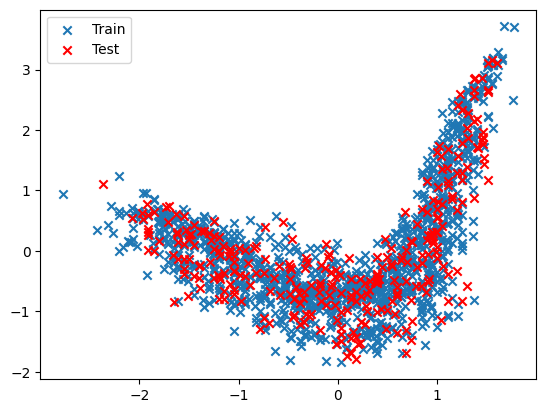

In [ ]:
df = pd.read_csv('/content/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('/content/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')

plt.legend(['Train', 'Test'])

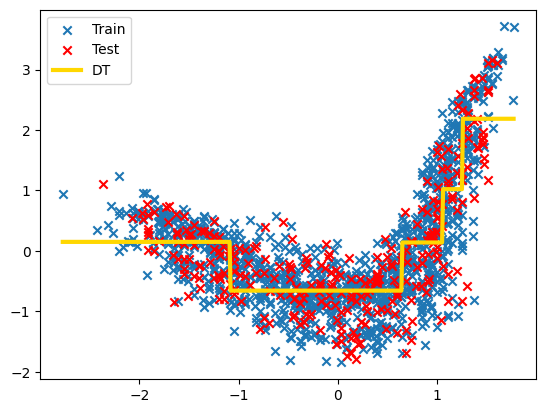

In [ ]:
depth=4
reg=tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha=0.05)
reg.fit(x_train, y_train)

# Generate Data points for plotting

xp=np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
yp=reg.predict(xp)

plt.scatter(x_train,y_train,marker='x')
plt.scatter(x_test,y_test,c='r', marker='x')
plt.plot(xp,yp,color="gold", linewidth=3)

plt.legend(['Train', 'Test', 'DT'])


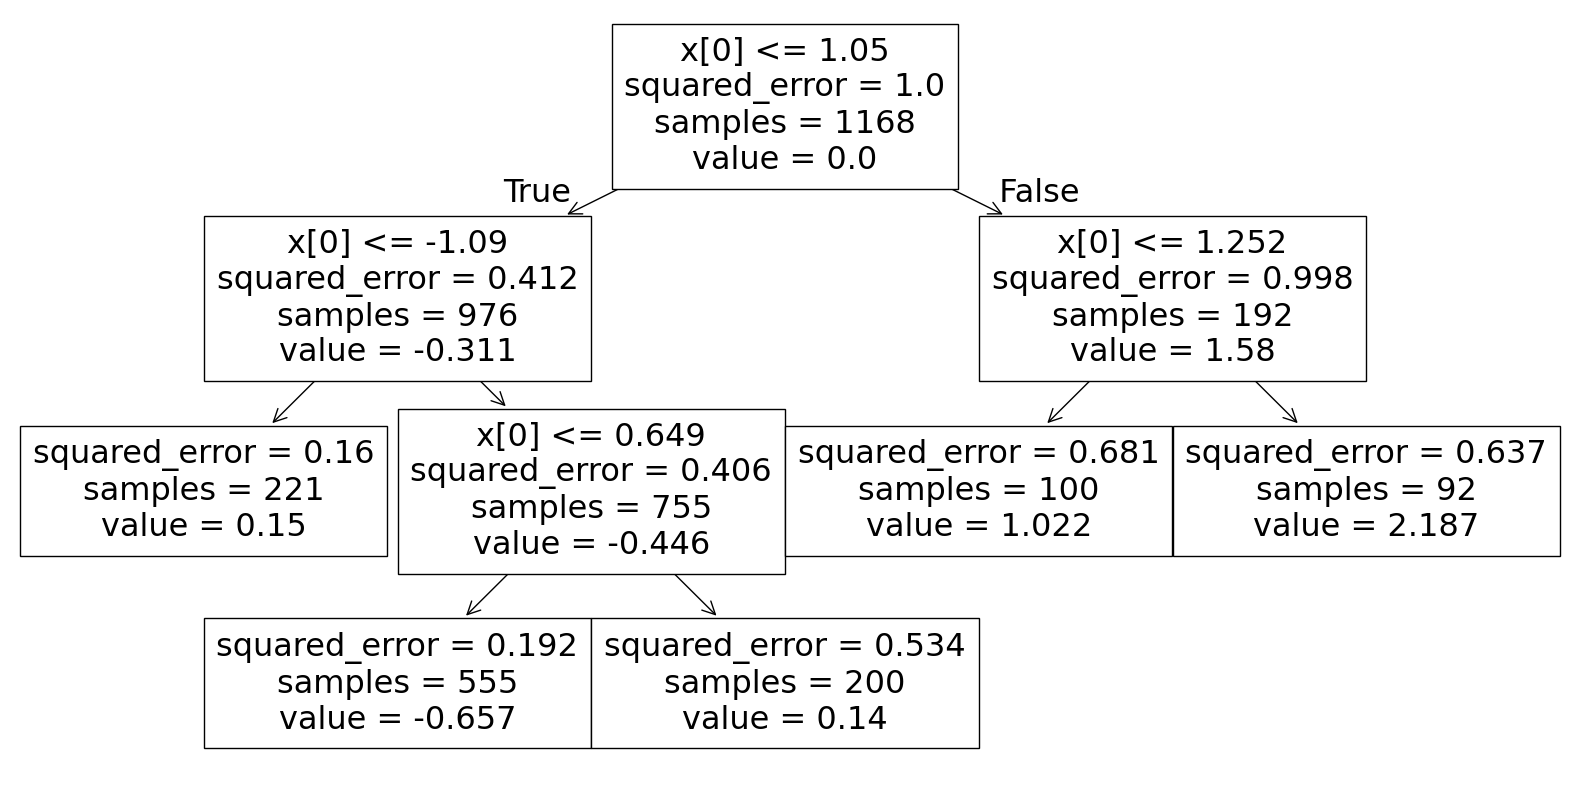

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(reg);

In [ ]:
reg.score(x_test,y_test),reg.score(x_train,y_train)

(0.6102814513496133, 0.6786002767516198)